In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

In [5]:
iris = datasets.load_iris() 
binary_target = np.array([1. if x == 0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

In [9]:
with tf.Session() as sess:
    batch_size = 20
    x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    
    A = tf.Variable(tf.random_normal(shape=[1, 1]))
    b = tf.Variable(tf.random_normal(shape=[1, 1]))
    
    my_mult = tf.matmul(x2_data, A)
    my_add = tf.add(my_mult, b)
    my_output = tf.subtract(x1_data, my_add)
    
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output,
                                                       labels=y_target)
    my_opt = tf.train.GradientDescentOptimizer(0.05)
    train_step = my_opt.minimize(xentropy)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(1000):
        rand_index = np.random.choice(len(iris_2d), size=batch_size)
        rand_x = iris_2d[rand_index]
        rand_x1 = np.array([[x[0]] for x in rand_x])
        rand_x2 = np.array([[x[1]] for x in rand_x])
        rand_y = np.array([[y] for y in binary_target[rand_index]])
        sess.run(train_step, feed_dict={x1_data: rand_x1,
                                        x2_data: rand_x2,
                                        y_target: rand_y})
        if (i + 1) % 200 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))
        
        [[slope]] = sess.run(A)
        [[intercept]] = sess.run(b)

Step #200 A = [[8.54478]], b = [[-3.553219]]
Step #400 A = [[10.126664]], b = [[-4.6421523]]
Step #600 A = [[10.991569]], b = [[-5.3720465]]
Step #800 A = [[11.727156]], b = [[-5.8694835]]
Step #1000 A = [[12.293639]], b = [[-6.2831306]]


In [10]:
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
    ablineValues.append(slope * i + intercept)

In [11]:
setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
non_setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 0]
non_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 0]

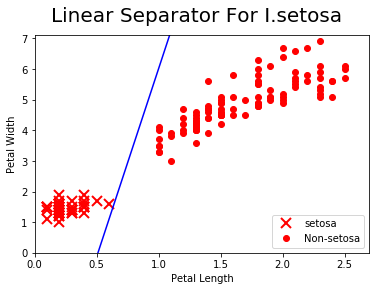

In [14]:
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()